In [4]:
import re
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
# Charger le DataFrame
df = pd.read_csv("2009_01_with_predictions.csv")

# Fonction pour extraire le premier tag (repris de la pipeline)
def extract_first_tag(tag):
    match = re.search(r'<(.*?)>', tag)
    return match.group(1) if match else None

# Appliquer la fonction pour extraire le premier tag dans une nouvelle colonne
df['FirstTag'] = df['Tags'].apply(extract_first_tag)

# Ajouter la colonne score
df['Score'] = (df['FirstTag'] == df['PredictionModele']).astype(int)  

# Afficher le DataFrame à jour
print(df[['FirstTag', 'PredictionModele', 'Score']])

# Enregistrer le DataFrame à jour
df.to_csv("2009_01_with_predictions.csv", index=False)

          FirstTag PredictionModele  Score
0                c               c#      0
1              c++             java      0
2           python           python      1
3       statistics               c#      0
4    collaboration               c#      0
..             ...              ...    ...
252             c#               c#      1
253              c              c++      0
254          linux               c#      0
255          mysql              sql      0
256           math               c#      0

[257 rows x 3 columns]


In [21]:
df = pd.read_csv("2009_10_with_predictions.csv")

         Mois  Accuracy
0   2009_01_w  0.431907
1   2009_02_w  0.431907
2   2009_03_w  0.473282
3   2009_04_w  0.467811
4   2009_05_w  0.447917
5   2009_06_w  0.474576
6   2009_07_w  0.462312
7   2009_08_w  0.457726
8   2009_09_w  0.420000
9   2009_10_w  0.478723
10  2009_11_w  0.408696
11  2009_12_w  0.507009


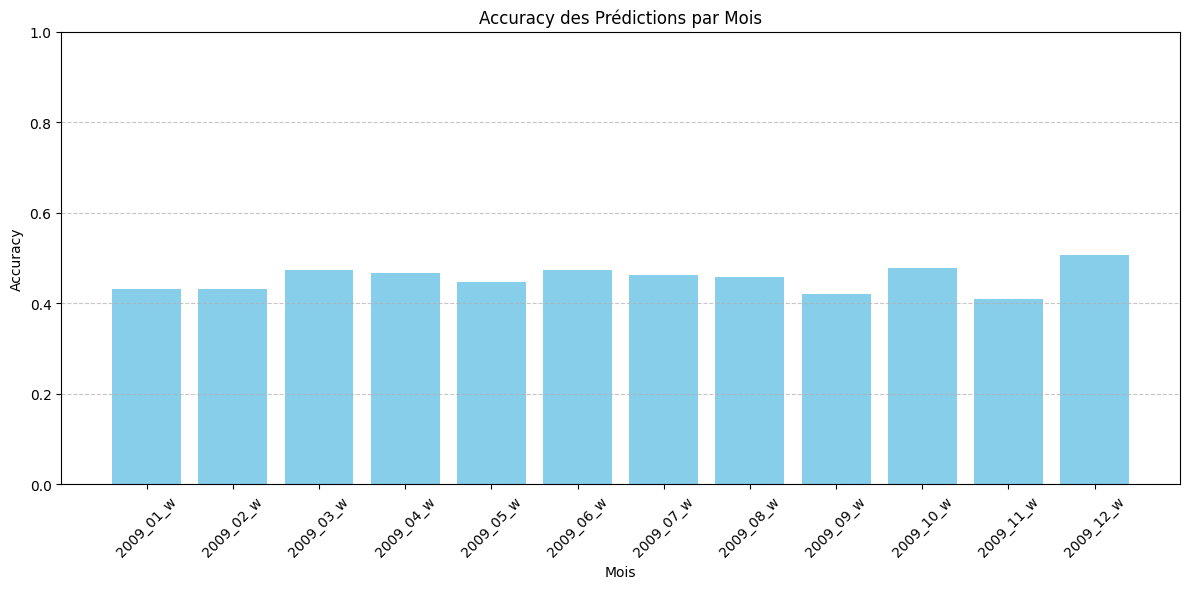

In [23]:

# List des csv avec prédictions pour chaque mois
mois_fichiers = ['2009_01_with_predictions.csv', '2009_02_with_predictions.csv', '2009_03_with_predictions.csv', '2009_04_with_predictions.csv',
                 '2009_05_with_predictions.csv', '2009_06_with_predictions.csv', '2009_07_with_predictions.csv', '2009_08_with_predictions.csv',
                 '2009_09_with_predictions.csv', '2009_10_with_predictions.csv', '2009_11_with_predictions.csv', '2009_12_with_predictions.csv']

# Dictionnaire pour stocker les résultats d'accuracy par mois
resultats = {'Mois': [], 'Accuracy': []}

# Boucle sur chaque fichier CSV pour calculer l'accuracy
for fichier in mois_fichiers:
   
    df = pd.read_csv(fichier)
    
    # Calculer la moyenne de la colonne Score 
    accuracy = df['Score'].mean()
    
    # Stocker les résultats
    resultats['Mois'].append(fichier[:-19]) 
    resultats['Accuracy'].append(accuracy)

# Convertir les résultats en DF
resultats_df = pd.DataFrame(resultats)

# Afficher les résultats
print(resultats_df)

# Trace du graphique de l'accuracy par mois
plt.figure(figsize=(12, 6))
plt.bar(resultats_df['Mois'], resultats_df['Accuracy'], color='skyblue')
plt.title('Accuracy des Prédictions par Mois')
plt.xlabel('Mois')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()


In [22]:
df.head(15)

,Title,Body,Tags,PredictionModele,FirstTag,Score
0,Is there any practical use for an esoteric lan...,"<p>Do you know any example of an <a href=""http...",<esoteric-languages>,c#,esoteric-languages,0
1,How to copy char *str to char c[] in C?,<p>Trying to copy a <code>char *str</code> to ...,<c><string><char>,c,c,1
2,JavaScript: {}==false is a SyntaxError?,"<p>In Firefox 3.5, I type this in the Firebug ...",<javascript><syntax-error><equality>,javascript,javascript,1
3,"SQL query slow from .NET code, but not interac...",<p>We are using an ORM that is executing a cal...,<sql><sql-server><tsql><llblgenpro>,c#,sql,0
4,"I've learned jQuery, should I go back and lear...","<p>I'm primarily a server side developer, work...",<javascript><jquery><frameworks><mootools>,javascript,javascript,1
5,Program to find prime numbers,<p>I want to find the prime number between 0 a...,<c#><.net><primes><sieve-of-eratosthenes>,c#,c#,1
6,Why can't I do ++i++ in C-like languages?,<p>Half jokingly half serious <strong>:</stron...,<c#><c><post-increment><pre-increment>,c#,c#,1
7,Why is GW-BASIC still taught in schools?,"<p>I dunno about USA and the UK, but in India,...",<gw-basic>,python,gw-basic,0
8,Algorithm Optimization - Shortest Route Betwee...,<p>Problem: I have a large collection of poin...,<algorithm><search><routes><mathematical-optim...,c#,algorithm,0
9,How do a send an HTTPS request through a proxy...,<p>I am trying to send a request to a server u...,<java><proxy><sslhandshakeexception>,c#,java,0
